<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/IMDB_Subwords8K_with_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download and prepare the dataset

In [2]:
# Download the dataset
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZLMAUS/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZLMAUS/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZLMAUS/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


### Prepare the dataset

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training data
training_data = train_data.shuffle(BATCH_SIZE)

# Batch and pad the datasets
training_data = training_data.padded_batch(BATCH_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

### Build and compile model

In [4]:
import tensorflow as tf

embedding_dim = 64


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573249 (2.19 MB)
Trainable params: 573249 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [6]:
NUM_EPOCHS = 10

history = model.fit(training_data, epochs=NUM_EPOCHS, validation_data=test_data)

Epoch 1/10
98/98 [==============================] - 96s 864ms/step - loss: 0.6043 - accuracy: 0.6616 - val_loss: 0.3962 - val_accuracy: 0.8268
Epoch 2/10
98/98 [==============================] - 34s 346ms/step - loss: 0.2877 - accuracy: 0.8789 - val_loss: 0.2686 - val_accuracy: 0.8872
Epoch 3/10
98/98 [==============================] - 28s 276ms/step - loss: 0.1549 - accuracy: 0.9470 - val_loss: 0.2738 - val_accuracy: 0.8886
Epoch 4/10
98/98 [==============================] - 19s 187ms/step - loss: 0.0746 - accuracy: 0.9810 - val_loss: 0.3330 - val_accuracy: 0.8800
Epoch 5/10
98/98 [==============================] - 15s 157ms/step - loss: 0.0317 - accuracy: 0.9950 - val_loss: 0.3169 - val_accuracy: 0.8874
Epoch 6/10
98/98 [==============================] - 14s 145ms/step - loss: 0.0140 - accuracy: 0.9991 - val_loss: 0.3519 - val_accuracy: 0.8871
Epoch 7/10
98/98 [==============================] - 13s 132ms/step - loss: 0.0057 - accuracy: 0.9999 - val_loss: 0.3530 - val_accuracy: 0.8906

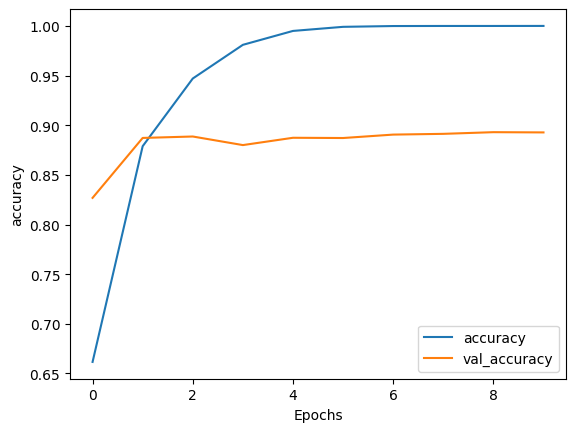

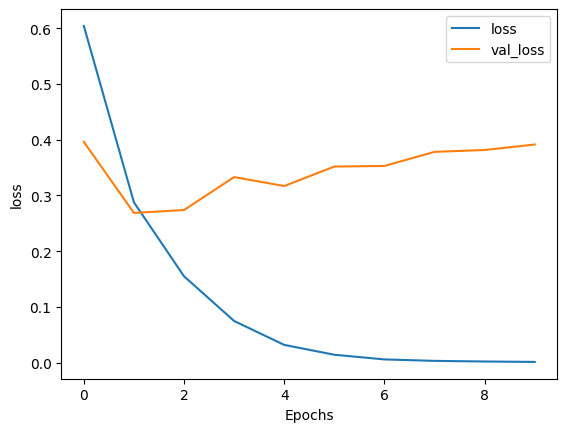

In [7]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The accuracy is better than what was achieved with LSTM